# Compare U87MG motility in different cases 

In [2]:
from track_fns import *
# import os.path
import numpy as np
from matplotlib import pyplot as plt
from LineageTree import lineageTree
import scipy.stats as stats
import xml.etree.ElementTree as ET
import os
# fix for ete 
os.environ['QT_QPA_PLATFORM']='offscreen'
from ete3 import TreeStyle,NodeStyle
plt.rcParams.update({'font.size': 22})

# Load all necessary data

In [6]:
print('Exp 22'.center(40,'-'))
dat22_500um,tree22_500um = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/22PD_downscaled/well_6_500TMZ_U87MG.xml')
dat22_control,tree22_control = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/22PD_downscaled/well_1_control_U87MG_3.xml')

dat22_hela_500um,tree22_hela_500um = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/22PD_downscaled/well_12_500TMZ_Helarestored.xml')
dat22_hela_control,tree22_hela_control = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/22PD_downscaled/well_7_control_Hela.xml')
print('Exp 33'.center(40,'-'))

dat33_500um,tree33_500um = track_to_coords('/mnt/dioscuri-nas/Pragyesh/33PD_030323_TMZ_removal/For_tracking/04_500umalltime-1_new_final5.xml')
dat33_control,tree33_control = track_to_coords('/mnt/dioscuri-nas/Pragyesh/33PD_030323_TMZ_removal/For_tracking/01_Control-1_1505.xml')

print('Exp 40'.center(40,'-'))

dat40_500um,tree40_500um = track_to_coords('/mnt/dioscuri-nas2/Pragyesh/40PD_U87MG_mgmt-OFP_cells_with_filtered_media/For_tracking/well_7_corrected_crop_500uM_TMZ.xml')
dat40_control,tree40_control = track_to_coords('/mnt/dioscuri-nas2/Pragyesh/40PD_U87MG_mgmt-OFP_cells_with_filtered_media/For_tracking/well_4_corrected_crop_control.xml')

print('Exp 54'.center(40,'-'))
dat54_500um,tree54_500um = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/well_F6_TMZ4.xml')
dat54_control,tree54_control = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/well_C6_control2.xml')


-----------------Exp 22-----------------
well_6_500TMZ_U87MG.xml
time step: 10.0 min	pixel size: [1.33200133 1.33200133] um	#tracks: 27, ( 0 <  5 timepoints)
well_1_control_U87MG_3.xml
time step: 10.0 min	pixel size: [1.33200133 1.33200133] um	#tracks: 150, ( 2 <  5 timepoints)
well_12_500TMZ_Helarestored.xml
time step: 10.0 min	pixel size: [1.33200133 1.33200133] um	#tracks: 596, ( 541 <  5 timepoints)
well_7_control_Hela.xml
time step: 10.0 min	pixel size: [1.33200133 1.33200133] um	#tracks: 112, ( 5 <  5 timepoints)
-----------------Exp 33-----------------
04_500umalltime-1_new_final5.xml
time step: 29.997794596354165 min	pixel size: [0.66917518 0.66917518] um	#tracks: 88, ( 2 <  5 timepoints)
01_Control-1_1505.xml
time step: 29.99945068359375 min	pixel size: [0.66917518 0.66917518] um	#tracks: 73, ( 1 <  5 timepoints)
-----------------Exp 40-----------------
well_7_corrected_crop_500uM_TMZ.xml
time step: 30.0 min	pixel size: [0.33200002 0.33200002] um	#tracks: 58, ( 4 <  5 timepoin

# fluo data

In [10]:
dat_fluo40_500um = load_from_pickle('/mnt/dioscuri-nas/Ilyas/Results/Cells/40PD_well7_all_cells_imgs_w_fit_bg_new.bin',None)
dat_fluo40_control = load_from_pickle('/mnt/dioscuri-nas/Ilyas/Results/Cells/40PD_well4_all_cells_imgs_w_fit_bg_new.bin',None)

Ran out of input
Ran out of input


NameError: name 'control' is not defined

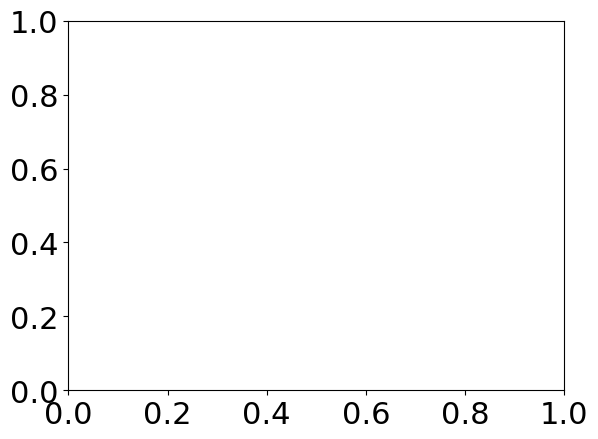

In [4]:
fig, ax = plt.subplots()

for pos,time,_ in zip(*control): 
    ax.plot(pos[:,0],pos[:,1],color='blue')
for pos,time,_ in zip(*highdose): 
    ax.plot(pos[:,0],pos[:,1],color='red')
for pos,time,_ in zip(*hela): 
    ax.plot(pos[:,0],pos[:,1],color='green')   
#display(fig)
#plt.ion()

# Speed histogram

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


average speed Exp22,control: 0.6137224104198247
average speed Exp22,500um: 0.8040599489082161
average speed Exp 33,control: 0.23970514646710372
average speed Exp 33,500um: 0.4747382307024871
average speed Exp40,control: 0.2928290146613525
average speed Exp40,500um: 0.38870489875061986
average speed Exp54,control: 0.2649429296644757
average speed Exp54,500um: 0.2670200355165377


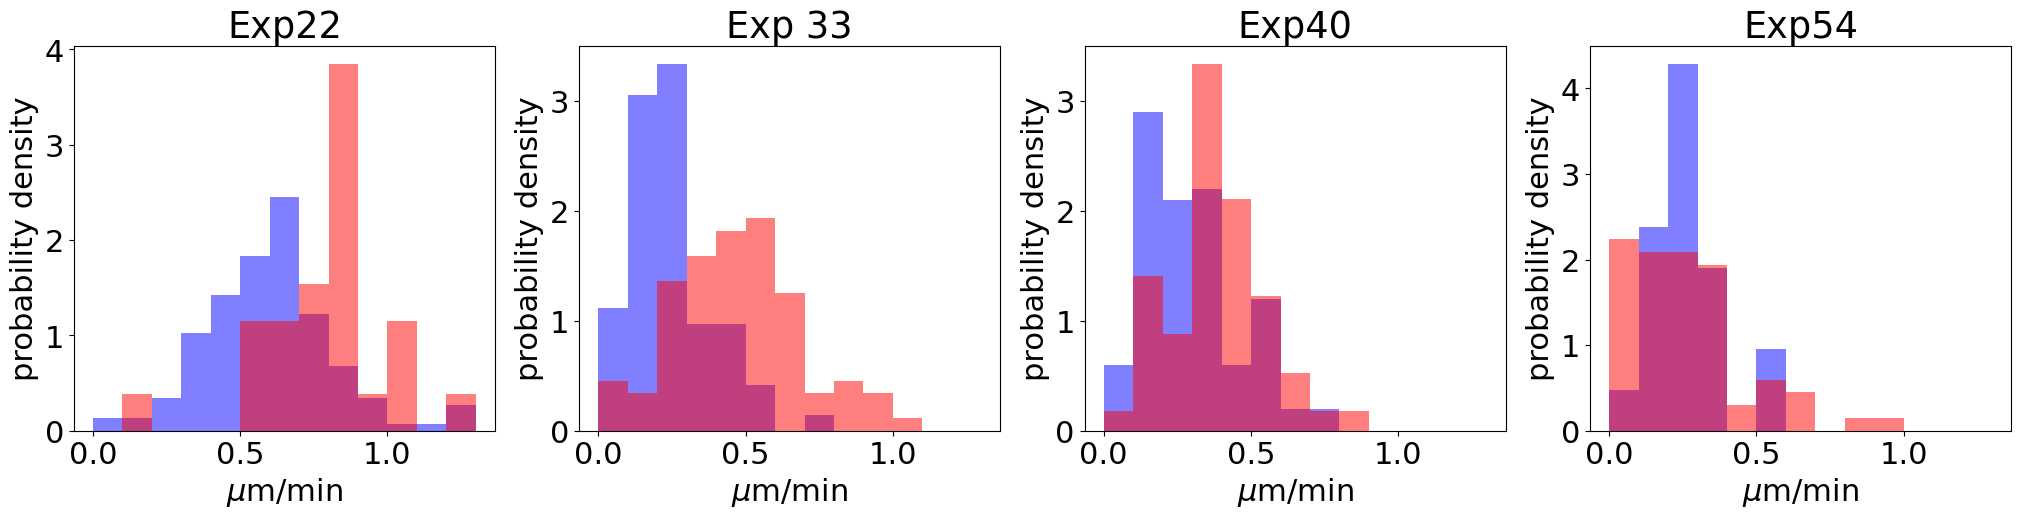

In [5]:
fig,ax = plt.subplots(1,4,figsize=(25,5))

for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control,dat54_500um),  (dat22_500um,dat33_500um,dat40_500um,dat22_hela_500um,dat54_500um),('Exp22','Exp 33','Exp40','Exp54'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        ax[i].hist(get_avg_speed(dat),color=color,label=lab,density=True,alpha=0.5,bins=np.arange(0,1.4,0.1))
        print(f'average speed {exp_label},{lab}: {np.nanmean(get_avg_speed(dat))}')
    #ax[i].legend()
    ax[i].set_title(exp_label)
    ax[i].set_xlabel('$\mu$m/min')
    ax[i].set_ylabel('probability density')
#plt.savefig('distributions_avg_speed_22-33-40.pdf',bbox_inches='tight')

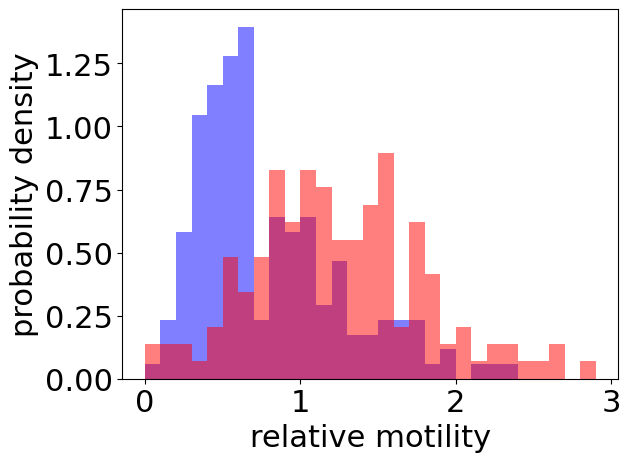

In [6]:

# pool 
fig,ax = plt.subplots()
control_dat = [get_avg_speed(z) for z in (dat33_control,dat40_control)]
tmz_dat = [get_avg_speed(z) for z in (dat33_500um,dat40_500um)]
means = [np.nanmean(np.concatenate((x,y))) for x,y in zip(control_dat,tmz_dat) ]

control_dat = [x[x> 0]/y for x,y in zip(control_dat,means)]
tmz_dat = [x[x>0]/y for x,y in zip(tmz_dat,means)]

ax.hist(np.concatenate(control_dat),color='blue',density=True,alpha=0.5,bins=np.arange(0,3.0,0.1))
ax.hist(np.concatenate(tmz_dat),color='red',density=True,alpha=0.5,bins=np.arange(0,3.0,0.1))
#ax.legend()
ax.set_xlabel('relative motility')
ax.set_ylabel('probability density')
plt.savefig('distributions_avg_speed_cumulated.pdf',bbox_inches='tight')

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


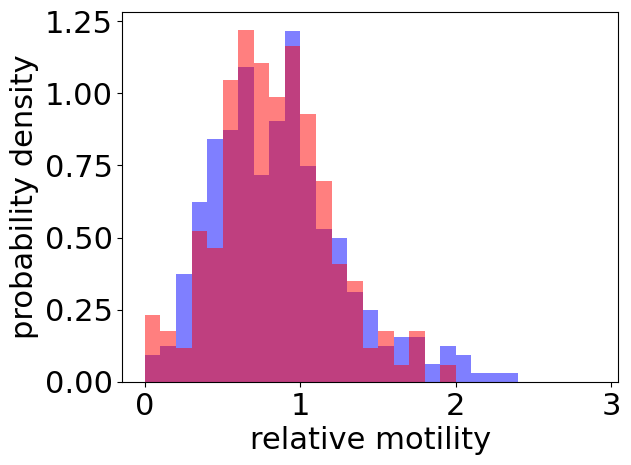

In [7]:
# pool 
fig,ax = plt.subplots()
control_dat = [get_avg_speed(z) for z in (dat22_control,dat33_control,dat40_control)]
tmz_dat = [get_avg_speed(z) for z in (dat22_500um,dat33_500um,dat40_500um)]
means = [np.nanmean(np.concatenate((x,y))) for x,y in zip(control_dat,tmz_dat) ]
 
control_dat = [x[x> 0]/y for x,y in zip(control_dat,means)]
tmz_dat = [x[x>0]/(1.5*y) for x,y in zip(tmz_dat,means)]

ax.hist(np.concatenate(control_dat),color='blue',density=True,alpha=0.5,bins=np.arange(0,3.0,0.1))
ax.hist(np.concatenate(tmz_dat),color='red',density=True,alpha=0.5,bins=np.arange(0,3.0,0.1))
#ax.legend()
ax.set_xlabel('relative motility')
ax.set_ylabel('probability density')
plt.savefig('distributions_avg_speed_cumulated.pdf',bbox_inches='tight')

# Displacement over time 

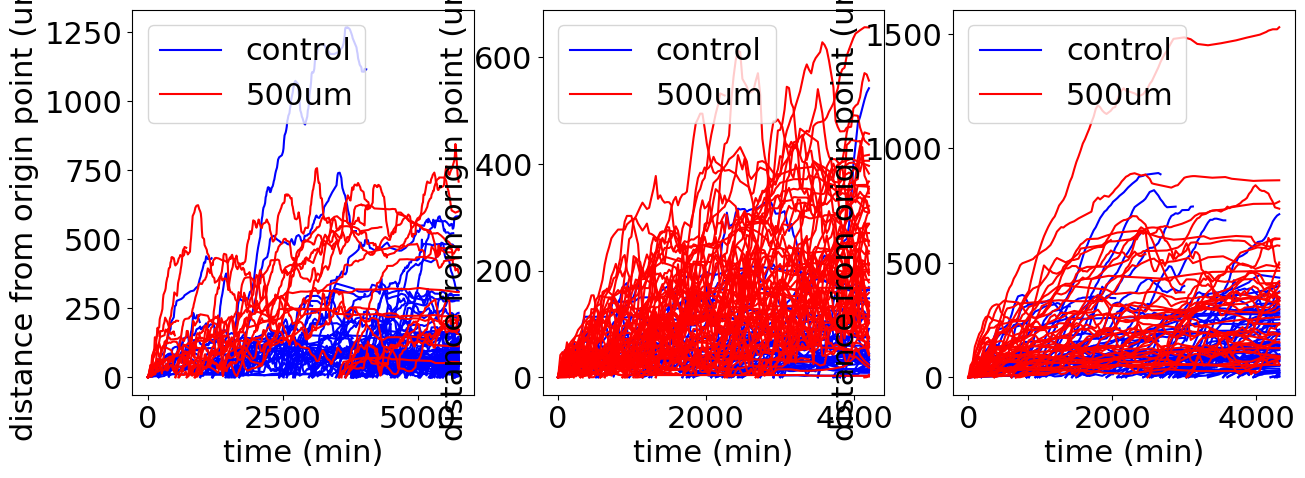

In [9]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control),  (dat22_500um,dat33_500um,dat40_500um),('Exp22','Exp 33','Exp40'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        first = True
        for time,disp,speed in zip(dat[1],get_displacement(dat),get_speed(dat)):
            if first: 
                ax[i].plot(time,disp,label=lab,color=color)
                first = False
            else: ax[i].plot(time,disp,color=color)
    ax[i].set_xlabel('time (min)')
    ax[i].set_ylabel('distance from origin point (um)')
    ax[i].legend()

# Max displacement

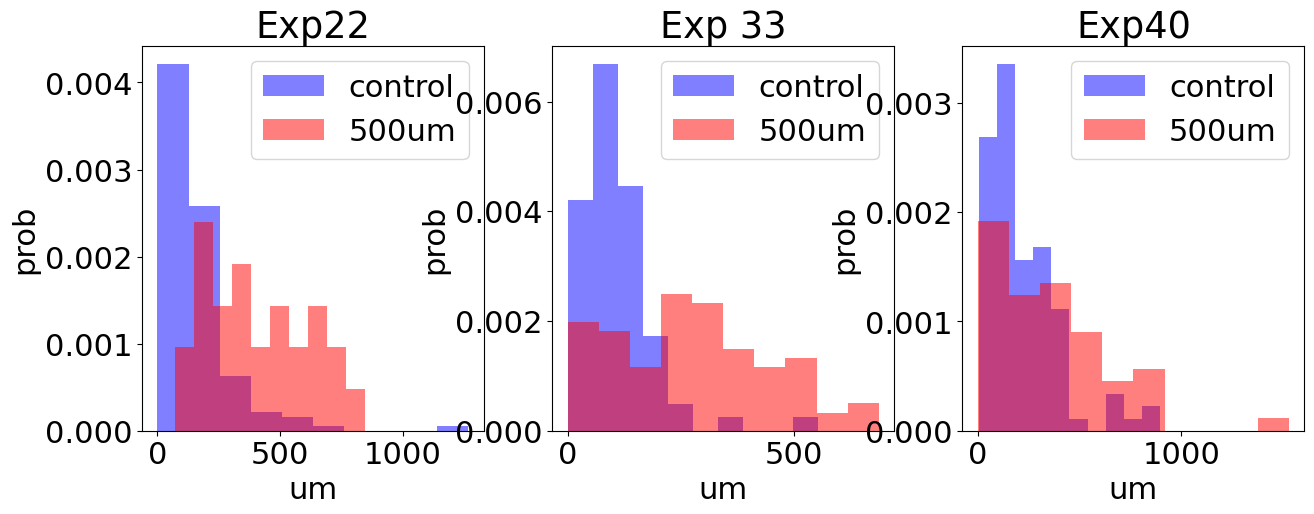

In [10]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control),  (dat22_500um,dat33_500um,dat40_500um),('Exp22','Exp 33','Exp40'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        ax[i].hist(get_max_displacement(dat),color=color,label=lab,density=True,alpha=0.5)
    ax[i].legend()
    ax[i].set_title(exp_label)
    ax[i].set_xlabel('um')
    ax[i].set_ylabel('prob')
    

# Distribution of instantaneous speed

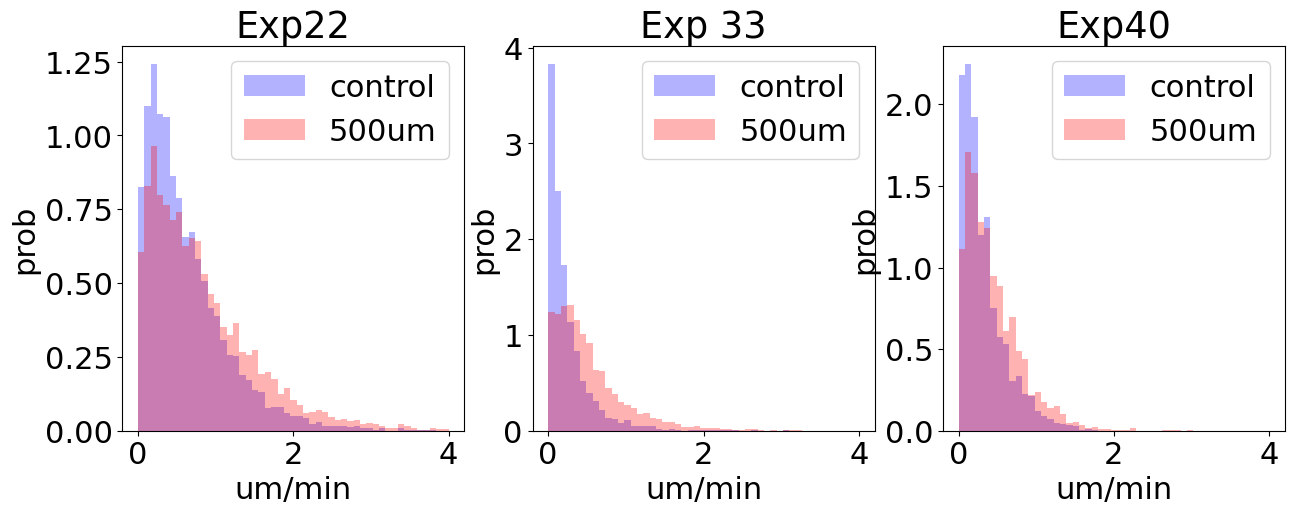

In [11]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control),  (dat22_500um,dat33_500um,dat40_500um),('Exp22','Exp 33','Exp40'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        all_speeds = np.concatenate(get_speed(dat))
        ax[i].hist(all_speeds,color=color,bins=np.linspace(0,4,50),alpha=0.3,density=True,label=lab)
    ax[i].legend()
    ax[i].set_title(exp_label)
    ax[i].set_xlabel('um/min')
    ax[i].set_ylabel('prob')

# Distance travelled vs speed

/tmp/ipykernel_860599/3774523252.py:20: RuntimeWarning: invalid value encountered in divide
  ax[i].scatter(av_speeds,max_distance/len_tracks,label=lab,color=color)


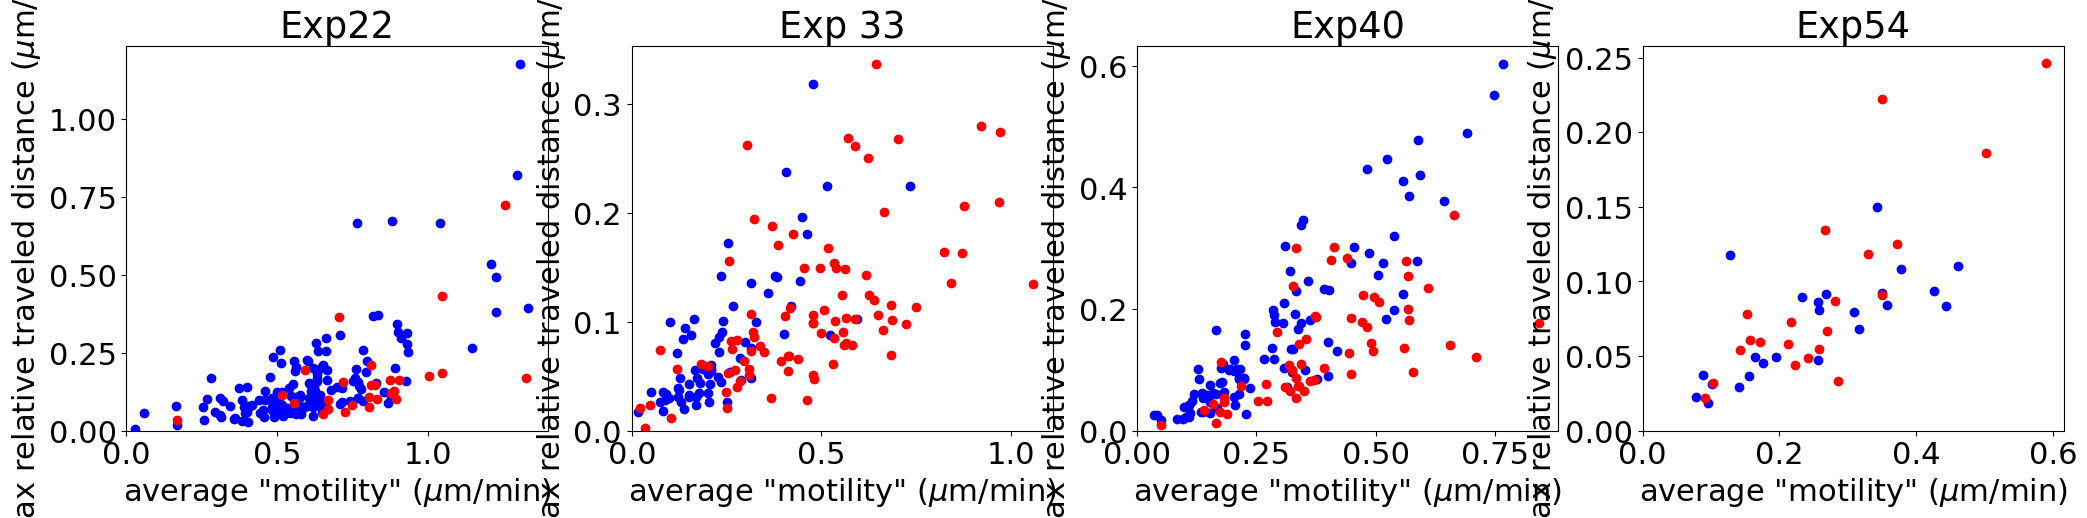

In [226]:
fig,ax = plt.subplots(1,4,figsize=(25,5))
from sklearn.linear_model import LinearRegression
for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control,dat54_control),  
                                                   (dat22_500um,dat33_500um,dat40_500um,dat54_500um),
                                                   ('Exp22','Exp 33','Exp40','Exp54'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        first = True
        alltimes = np.concatenate(dat[1])
        min_time,max_time = np.min(alltimes),np.max(alltimes)
        av_speeds,max_distance = get_avg_speed(dat),get_max_displacement(dat)
        assert len(av_speeds) == len(max_distance)
        times_tracks = dat[1]
        len_tracks = np.array([x[-1] - x[0] for x in times_tracks])
        if(np.any(len_tracks == 1)): print(exp_label,lab)
        #valid_tracks = np.array(get_valid_tracks(dat)) 
        #av_speeds = av_speeds[valid_tracks]
        #max_distance = max_distance[valid_tracks]
        #len_tracks = len_tracks[valid_tracks]
        ax[i].scatter(av_speeds,max_distance/len_tracks,label=lab,color=color)
        #LinearRegression
    ax[i].set_xlabel('average "motility" ($\mu$m/min)')
    ax[i].set_ylabel('max relative traveled distance ($\mu$m/min)')
    ax[i].set_title(exp_label)
    ax[i].set_xlim(0)
    ax[i].set_ylim(0)
    #ax[i].legend()

# Motility vs division time 

In [10]:
# def get_div_times(dat):
#     div_times = []
#     alltimes = np.concatenate(dat[1])
#     min_time,max_time = np.min(alltimes),np.max(alltimes)
#     for pos,time,node_id in zip(*dat):
#         div_times.append(time[-1]-time[0])
#     return np.array(div_times)

# def get_valid_tracks(dat):
#     valid = []
#     alltimes = np.concatenate(dat[1])
#     min_time,max_time = np.min(alltimes),np.max(alltimes)
#     for pos,time,node_id in zip(*dat):
#         if time[0] == min_time or time[-1] == max_time: 
#             valid.append(False) 
#         else: 
#             valid.append(True)
#     return np.array(valid)

# def get_div_times(dat):
#     div_times = []
#     alltimes = np.concatenate(dat[1])
#     min_time,max_time = np.min(alltimes),np.max(alltimes)
#     for pos,time,node_id in zip(*dat):
#         if time[0] == min_time or time[-1] == max_time: 
#             div_times.append(-1) 
#         else: 
#             div_times.append(time[-1]-time[0])
#     return np.array(div_times)

# def plot_tree(tree):
#     from ete3 import TreeStyle,NodeStyle
#     ts = TreeStyle()
#     ts.scale =  10
#     ete_tree = create_tree_ete3(tree,None,None)
#     ete_tree.render('%%inline',tree_style=ts,h=1000)

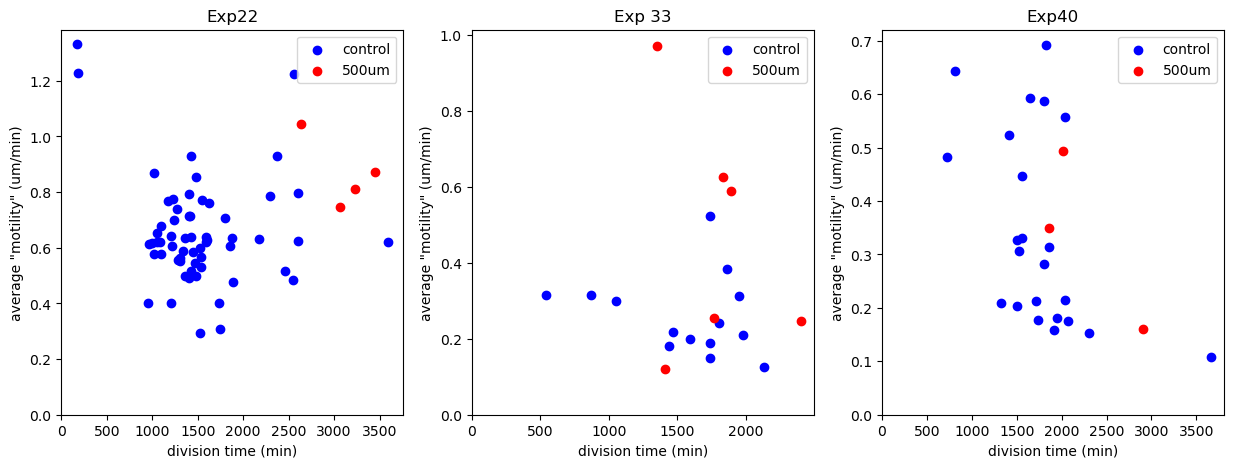

In [42]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control),  (dat22_500um,dat33_500um,dat40_500um),('Exp22','Exp 33','Exp40'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        first = True
        alltimes = np.concatenate(dat[1])
        min_time,max_time = np.min(alltimes),np.max(alltimes)
        av_speeds,div_times = get_avg_speed(dat),get_div_times(dat)
        assert len(av_speeds) == len(div_times)
        valid_tracks = np.array(get_valid_tracks(dat)) 
        av_speeds = np.array(av_speeds)[valid_tracks]
        div_times = div_times[valid_tracks]
        ax[i].scatter(div_times,av_speeds,label=lab,color=color)

    ax[i].set_xlabel('division time ({})'.format(time_unit))
    ax[i].set_ylabel('average "motility" (um/min)')
    ax[i].set_title(exp_label)
    ax[i].set_xlim(0)
    ax[i].set_ylim(0)
    ax[i].legend()

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


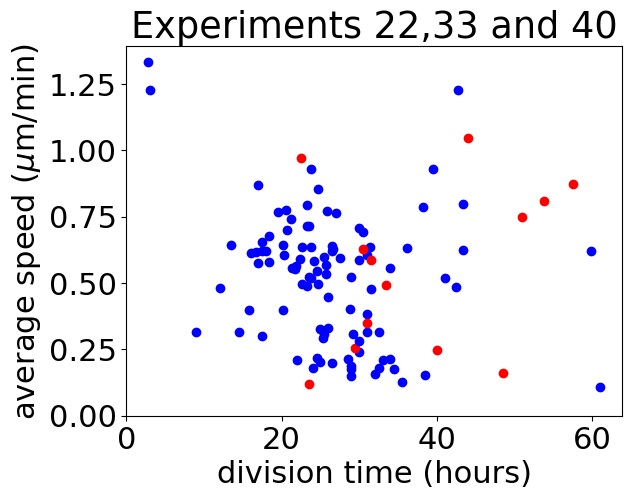

In [40]:
fig,ax = plt.subplots()#1,3,figsize=(15,5))
first = True
for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control),  (dat22_500um,dat33_500um,dat40_500um),('Exp22','Exp 33','Exp40'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        alltimes = np.concatenate(dat[1])
        av_speeds,div_times = get_avg_speed(dat),get_div_times(dat)
        assert len(av_speeds) == len(div_times)
        valid_tracks = np.array(get_valid_tracks(dat)) 
        av_speeds = np.array(av_speeds)[valid_tracks]
        div_times = div_times[valid_tracks]
        if not first: lab=None 
        ax.scatter(div_times/60,av_speeds,label=lab,color=color)
    first = False
ax.set_xlabel('division time (hours)'.format(time_unit))
ax.set_ylabel('average speed ($\mu$m/min)')
ax.set_title('Experiments 22,33 and 40')
ax.set_xlim(0)
ax.set_ylim(0)
#ax.legend()

plt.savefig('division_time_vs_motility.pdf',bbox_inches='tight')

# Lineage trees

## average speed tree

In [195]:
for i,(control,treated,tree_control,tree_treated,exp_label) in enumerate(
    zip((dat22_control,dat33_control,dat40_control),
        (dat22_500um,dat33_500um,dat40_500um),
        (tree22_control,tree33_control,tree40_control),  
        (tree22_500um,tree33_500um,tree40_500um),
        ('Exp22','Exp 33','Exp40'))):
    for dat,tree,lab in zip((control,treated),(tree_control,tree_treated),('control','500um')):
        ts = TreeStyle()
        ts.scale =  3
        ete_tree = create_tree_ete3(tree,None,None)
        speeds_id = get_speed(dat,by_id=True)
        avg_speed = get_avg_speed(dat)
        node_track = node_to_tracks(tree)
        maxspeed = max(avg_speed) # np.array(list(speeds_id.values())).max()
        
        for n in ete_tree.traverse('postorder'):
            n.img_style["size"] = 0 #this is required to ensure properly sized branches
            n.img_style["hz_line_width"] = 10
            #c=pow(node_to_vel[node.name]/max_vel,0.7)
            node_id = n.name
            if node_id == 'root': continue
            speed = avg_speed[node_track[node_id]]
            #if node_id in speeds_id:
            #    t = tree.time[node_id]
            # normalise speed 
            c = pow(speed/maxspeed,0.7)
            if np.isnan(c): 
                n.img_style['hz_line_color'] = '#%02x%02x%02x' % (0, 0,0 )
            else:
                n.img_style['hz_line_color'] = '#%02x%02x%02x' % (int(255*c), 0, int(255*(1-c)))
        ete_tree.render(f'./plots/tree_speed_{exp_label}_{lab}.pdf',tree_style=ts,h=1000)        

In [205]:
# Plot everyone at once 
# from glob import glob
# plt.figure(figsize=(20,10))
# columns = 2
# images = glob('./plots/tree_speed_*pdf')
# for i, image in enumerate(images):
#     image = render_pdf_notebook(image)
#     plt.subplot(len(images) // columns + 1, columns, i + 1)
#     ax = plt.gca()
#     ax.axis('off')
#     plt.imshow(image)
#     #render_pdf_notebook('/tmp/exp_Exp 33_control.pdf')

# MGMT fluorescence

In [14]:
exp_label = 'Exp40'
for dat,tree,fluo,lab,color in zip((dat40_control,dat40_500um),
                             (tree40_control,tree40_500um),
                             (dat_fluo40_control,dat_fluo40_500um),
                             ('control','500um'),
                             ('blue','red') ):
    fluo_by_node = get_fluo_by_node(fluo)
    #valid_tracks = get_valid_tracks(dat)
    avg_fluo_track = get_avg_fluo_track(dat,fluo_by_node)    
    max_fluo_track = max(avg_fluo_track)
    ete_tree = create_tree_ete3(tree,None,None)
    node_track = node_to_tracks(tree)
    ts = TreeStyle()
    ts.scale =  3
    for n in ete_tree.traverse('postorder'):
        n.img_style["size"] = 0 #this is required to ensure properly sized branches
        n.img_style["hz_line_width"] = 10
        #c=pow(node_to_vel[node.name]/max_vel,0.7)
        node_id = n.name
        if node_id == 'root': 
            continue
        #if node_id in fluo_by_node:
        track_id = node_track[node_id]
        avg_fluo = avg_fluo_track[track_id]
        t = tree.time[node_id]
        # normalise fluorescence 
        c = avg_fluo/max_fluo_track # (fluorescence_by_node[node_id]-min_fluo[t])/delta_fluo[t]
        n.img_style['hz_line_color'] = '#%02x%02x%02x' % (int(255*c), 0, int(255*(1-c)))
        
    ete_tree.render(f'./plots/tree_fluo_{exp_label}_{lab}.pdf',tree_style=ts,h=1000)   
    

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)


## Fluo vs motility

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


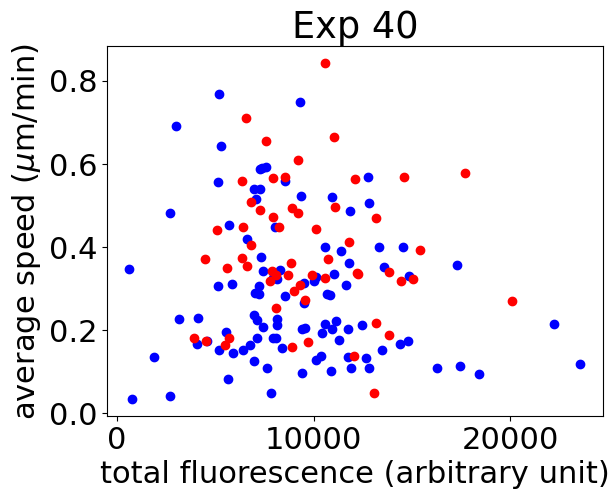

In [91]:
fig,ax = plt.subplots(1)#,figsize=(15,5))
exp_label = 'Exp 40'
dat = dat40_500um
lab = '500um'

for dat,xml,fluo,lab,color in zip((dat40_control,dat40_500um),
                             (tree40_control,tree40_500um),
                             (dat_fluo40_control,dat_fluo40_500um),
                             ('control','500um'),
                             ('blue','red') ):
    avg_speeds,div_times = get_avg_speed(dat),get_div_times(dat)
    fluo_by_node = get_fluo_by_node(fluo)
    avg_fluo = get_avg_fluo_track(dat,fluo_by_node)    
    valid_tracks = get_valid_tracks(dat) 
    #avg_speeds = avg_speeds[valid_tracks]
    #div_times = div_times[valid_tracks]
    #avg_fluo = avg_fluo[valid_tracks]
    ax.scatter(avg_fluo,avg_speeds,label=lab,color=color)
    ax.set_xlabel('total fluorescence (arbitrary unit)')
    ax.set_ylabel('average speed ($\mu$m/min)')
    ax.set_title(exp_label)
ax.legend()
plt.savefig('avg_speed_vs_fluorescence_exp40.pdf',bbox_inches='tight')

# Fluo vs life time

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


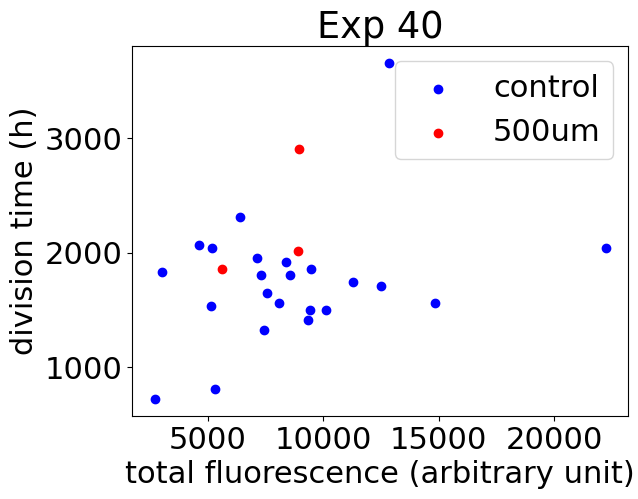

In [13]:
fig,ax = plt.subplots(1)#,figsize=(15,5))
exp_label = 'Exp 40'
dat = dat40_500um
lab = '500um'

for dat,xml,fluo,lab,color in zip((dat40_control,dat40_500um),
                             (tree40_control,tree40_500um),
                             (dat_fluo40_control,dat_fluo40_500um),
                             ('control','500um'),
                             ('blue','red') ):
    avg_speeds,div_times = get_avg_speed(dat),get_div_times(dat)
    fluo_by_node = get_fluo_by_node(fluo)
    avg_fluo = get_avg_fluo_track(dat,fluo_by_node)    
    valid_tracks = get_valid_tracks(dat)
    div_times = div_times[valid_tracks]
    avg_fluo = avg_fluo[valid_tracks]
    ax.scatter(avg_fluo,div_times,label=lab,color=color)
    ax.set_xlabel('total fluorescence (arbitrary unit)')
    ax.set_ylabel('division time (h)')
    ax.set_title(exp_label)
ax.legend()
plt.savefig('fluo_vs_lifetime_exp40.pdf',bbox_inches='tight')